# Ranks in Pytorch

We compute the Tanks Connected (FC) layers for all Pytorch pretrained models


http://pytorch.org/docs/master/torchvision/models.html



In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing Jupyter notebook from RMT_Util.ipynb
3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
numpy version 1.19.5
scipy version 1.4.1
tensforflow version 2.2.0
keras version 2.4.3
sklearn version 0.24.0
powerlaw version 1.4.4


In [3]:
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 16})

In [4]:
def analyze_model(model, plot=True):
    min_svs = []
    rank_loss = []
    alphas = []
    Qs = []
    matrix_ranks = []
    
    pretrained_model = model(pretrained=True)
    
    model_name = model.__name__
    model_name = model_name.replace("_",' ')
    
    for im, m in enumerate(pretrained_model.modules()):
        if isinstance(m, nn.Linear):
                
            W = np.array(m.weight.data.clone().cpu())
            M, N = np.min(W.shape), np.max(W.shape)
            Q=N/M 
            
            Qs.append(Q)

            sv, _ = RMT_Util.singular_spectrum(W)
            smallest_sv = np.min(sv)
            min_svs.append(smallest_sv)
            
            rank = np.linalg.matrix_rank(W)
            rank_loss.append(100*(M-rank)/M)
            
            if ((plot) and (Q > 1.2)):
                print(m)
                plt.hist(sv*sv, bins=100)
                plt.title(" N {} M {} Rank {}".format(N,M,rank))
                plt.show()
                
    return min_svs, rank_loss, Qs 


### Generate data for Table

Linear(in_features=9216, out_features=4096, bias=True)


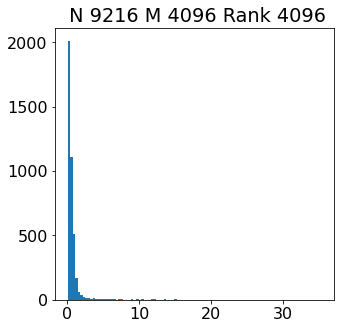

Linear(in_features=4096, out_features=1000, bias=True)


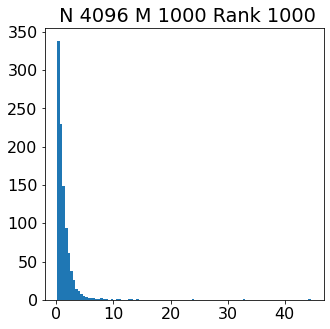

Linear(in_features=2208, out_features=1000, bias=True)


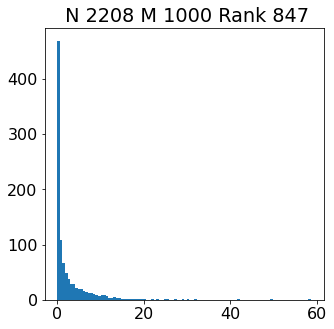

Linear(in_features=1664, out_features=1000, bias=True)


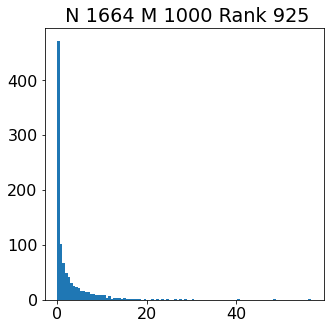

Linear(in_features=1920, out_features=1000, bias=True)


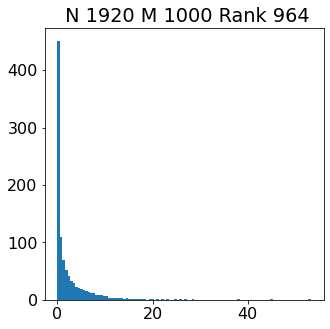

Linear(in_features=768, out_features=1000, bias=True)


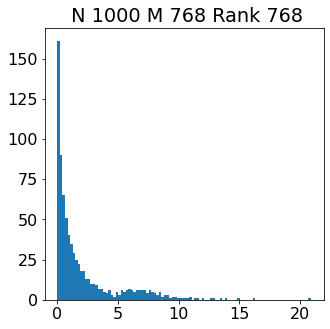

Linear(in_features=2048, out_features=1000, bias=True)


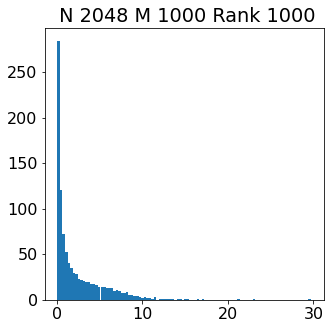

Linear(in_features=2048, out_features=1000, bias=True)


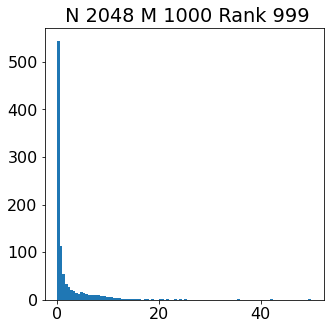

Linear(in_features=2048, out_features=1000, bias=True)


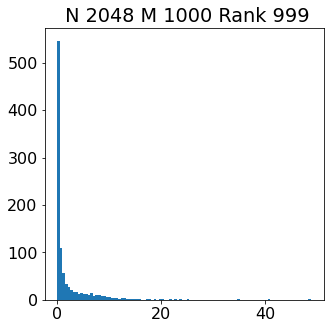

Linear(in_features=512, out_features=1000, bias=True)


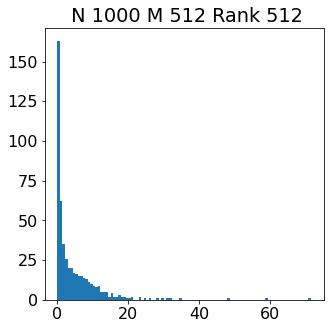

Linear(in_features=512, out_features=1000, bias=True)


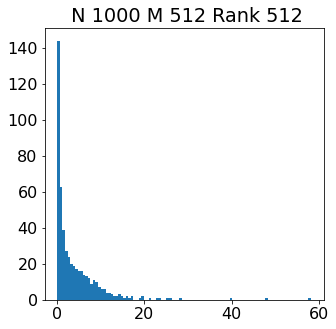

Linear(in_features=2048, out_features=1000, bias=True)


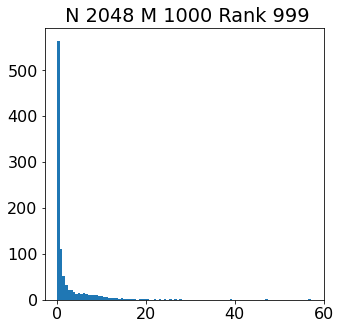

Linear(in_features=25088, out_features=4096, bias=True)


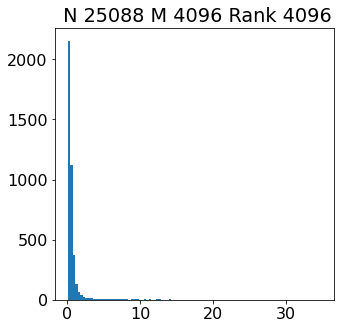

Linear(in_features=4096, out_features=1000, bias=True)


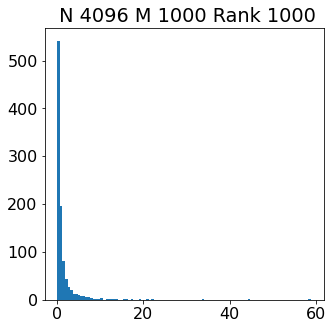

Linear(in_features=25088, out_features=4096, bias=True)


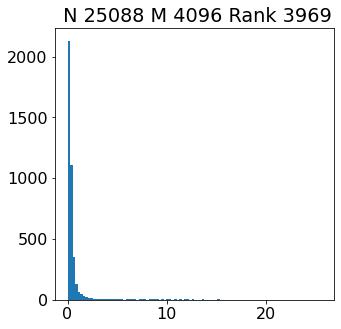

Linear(in_features=4096, out_features=1000, bias=True)


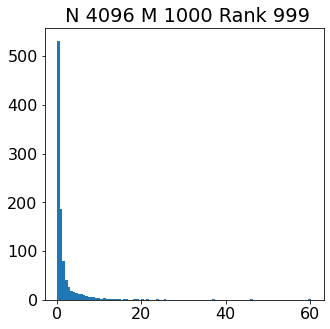

Linear(in_features=25088, out_features=4096, bias=True)


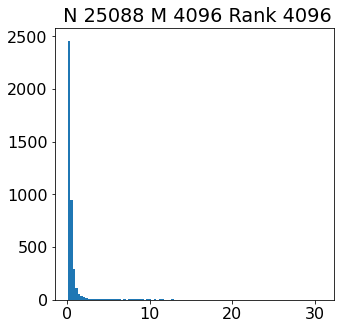

Linear(in_features=4096, out_features=1000, bias=True)


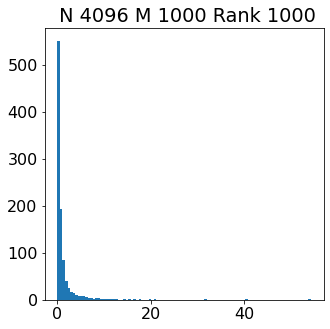

Linear(in_features=25088, out_features=4096, bias=True)


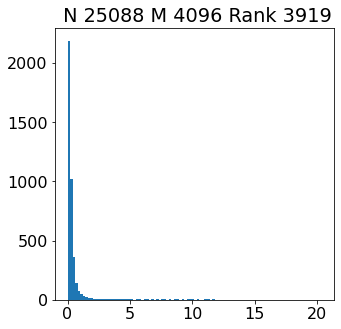

Linear(in_features=4096, out_features=1000, bias=True)


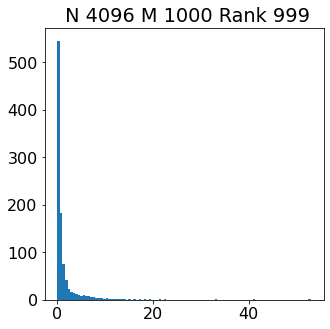

Linear(in_features=25088, out_features=4096, bias=True)


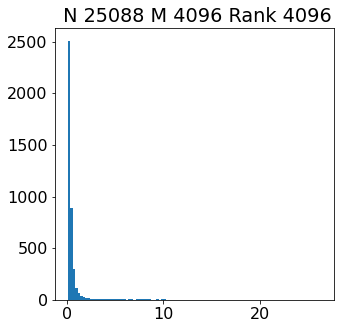

Linear(in_features=4096, out_features=1000, bias=True)


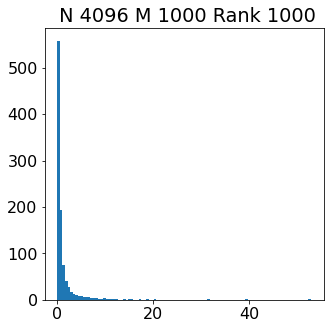

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /home/andrew/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Linear(in_features=25088, out_features=4096, bias=True)


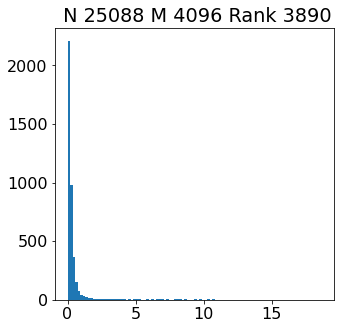

Linear(in_features=4096, out_features=1000, bias=True)


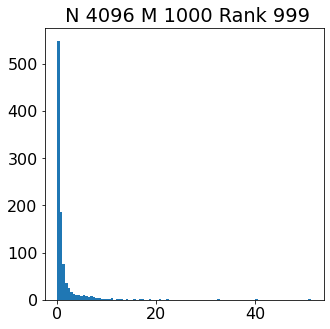

In [5]:
all_min_svs = []
all_rank_loss = []
all_alphas = []
all_Qs = []
for model in [models.alexnet, 
              models.densenet121, models.densenet161, models.densenet169, models.densenet201, 
              models.inception_v3,
              models.resnet101, models.resnet152, models.resnet18, models.resnet34, models.resnet50, 
              models.squeezenet1_0, models.squeezenet1_1,
              models.vgg11, models.vgg11_bn,
              models.vgg16, models.vgg16_bn,
              models.vgg19, models.vgg19_bn ]:
    #print(model)
    min_svs, rank_loss, Qs  = analyze_model(model, plot=True)
    all_min_svs.extend(min_svs)
    all_rank_loss.extend(rank_loss)
    #all_alphas.extend(alphas)
    all_Qs.extend(Qs)


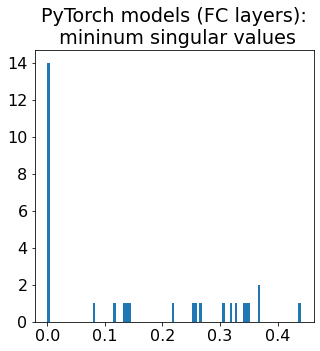

In [20]:
plt.hist(all_min_svs,bins=100);
plt.title("PyTorch models (FC layers):\n mininum singular values")
plt.savefig("With Q1.png")

In [21]:
np.sort(min_svs)

array([4.7848435e-08, 2.5648544e-07, 3.2874724e-01], dtype=float32)

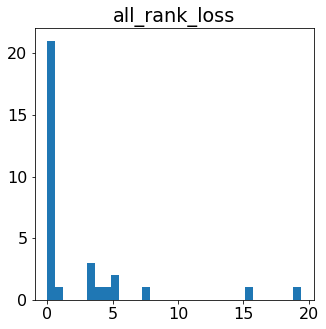

In [23]:
plt.hist(all_rank_loss,bins=32);
plt.title("all_rank_loss")
plt.savefig("all_rank_loss.png")

### Remove Q=1 cases

In [10]:
Qs = np.array(all_Qs)
ids = np.where(Qs>1.1)
len(Qs[ids])

24

In [19]:
SVs = np.array(all_min_svs)
SVs[ids]

array([8.0224521e-02, 4.4048303e-01, 7.4847613e-08, 3.7834252e-04,
       7.0955587e-04, 1.1697820e-01, 2.1774571e-01, 1.3959391e-01,
       1.3610722e-01, 3.0425730e-01, 3.1849152e-01, 1.4262439e-01,
       2.6473594e-01, 3.6889163e-01, 4.2262400e-08, 3.6713231e-01,
       2.5747961e-01, 3.4988719e-01, 5.0213742e-08, 3.4187415e-01,
       2.5341031e-01, 3.4379673e-01, 4.7848435e-08, 3.2874724e-01],
      dtype=float32)

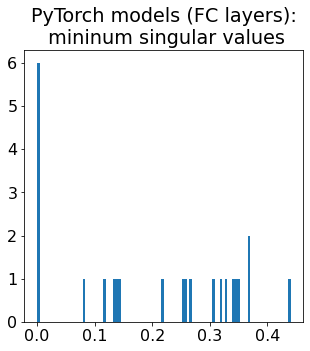

In [24]:
plt.hist(SVs[ids],bins=100);
plt.title("PyTorch models (FC layers):\n mininum singular values")
plt.savefig("Without_Q1.png")

### If we zoom in, only 4 of 6 are actually close to some threshold for 0

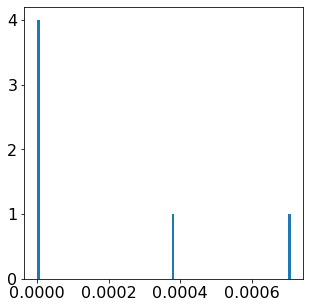

In [25]:
plt.hist(SVs[ids][SVs[ids]<0.01],bins=100);
plt.savefig("remove_threshold.png")

### What about actual Rank Loss

Only 1/2 of the matrices experience no rank loss ?
If we allow 1 small eigenvalue, then it is 18...same as we computed

IDK why it is different than our brute force calculations ?

In [14]:
RL = np.array(all_rank_loss)[ids]


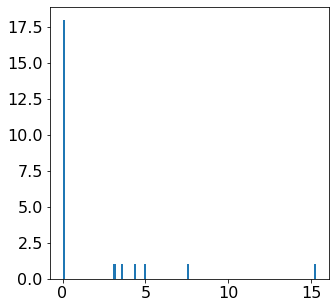

In [15]:
plt.hist(RL,bins=100);

Text(0.5, 1.0, '% rank loss, > 0')

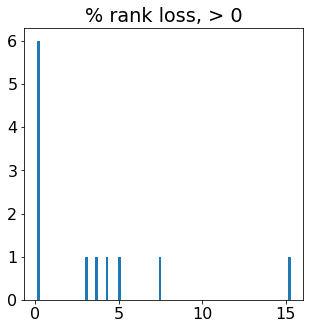

In [16]:
plt.hist(RL[RL>0],bins=100);
plt.title("% rank loss, > 0")

In [17]:
RL[RL>0]

array([15.3       ,  7.5       ,  3.6       ,  0.1       ,  0.1       ,
        0.1       ,  3.10058594,  0.1       ,  4.32128906,  0.1       ,
        5.02929688,  0.1       ])